In [1]:
import sys
sys.path.append("/home/wanxinli/deep_patient/synthetic_exp")
sys.path.append("/home/wanxinli/deep_patient/")

from common import *
from deep_patient.sda import SDA
from math import floor, exp
import matplotlib.pylab as pl
import numpy as np
from numpy.random import normal
from numpy.random import poisson
from numpy.random import dirichlet
import os
import ot
import ot.plot
from random import randint
import theano.tensor as T
from sklearn import linear_model
from sklearn import svm
from sklearn import preprocessing
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sim_common import *


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def simulate_coords_labels(mu, sigma, beta_1, beta_2, num_points, num_features, nz=.5, theta=0, p=.5, random_state=None, **kwargs):
    """ Simulate desired embeddings and labels
 
    Parameters
    ----------
    mu : list[float], size 2 (for embedding dimension 2)
        mean of MVN
    sigma : list[float], size 2
        standard deviation of MVN
    num_points: int
        number of points generated
    nz : float
        noise level (>0)
    p : float
        proportion of one class in the binary setting
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    Returns
    -------
    X : ndarray, shape (n, d), the desired embedding
        `n` observation of size `d`
    y : ndarray, shape (n,), the labels
        labels of the samples.
    """
    
    generator = check_random_state(random_state)
    
    x_1 = normal(mu[0], sigma[0], size=num_points)
    x_2 = normal(mu[1], sigma[1], size=num_points)
    x = np.column_stack((x_1, x_2))
    y = [x_1_elem * beta_1 + x_2_elem * beta_2 + nz * generator.randn(len(x_1), 1)[0] for x_1_elem, x_2_elem in zip(x_1, x_2)]

    new_x = []
    ori_dim = 2
    for i in range(x.shape[0]):
        cur_x = x[i].tolist()
        cur_x.extend(normal(0, 0, num_features-ori_dim))
        new_x.append(cur_x)


    return np.array(new_x), np.array(y)

In [3]:
def sim_wrapper(num_patient=1000):
    target_mu = [10, 1]
    target_sigma = [1, 1]
    source_mu = [1, 10]
    source_sigma = [1, 1]
    beta_1 = 0.5
    beta_2 = 10
    num_features = 20
    target_coords, target_labels = simulate_coords_labels(target_mu, target_sigma, beta_2, beta_1, num_patient, num_features)
    source_coords, source_labels = simulate_coords_labels(source_mu, source_sigma, beta_1, beta_2, num_patient, num_features)
    target_features = coords2features(target_coords)
    source_features = coords2features(source_coords)
    return source_features, source_labels, target_features, target_labels
    

In [4]:
entire_proc_cts(sim_wrapper, features2embs, linear_model.LinearRegression, 100000, reg_e=1)

/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


(2.4349466650362404,
 8.06498951474291,
 2.8398925181673533,
 70.89029542802247,
 5046.595666891869,
 71.03939517543677,
 75.28373974996857,
 6435.625544071127,
 80.22235065161782)

In [5]:
source_maes, source_mses, source_rmses,  target_maes, target_mses, target_rmses, \
        trans_target_maes, trans_target_mses, trans_target_rmses = \
        run_proc_multi_cts(sim_wrapper, features2embs, linear_model.LinearRegression, reg_e = 1, max_iter = 100000, n_times = 100)

iteration: 0
iteration: 1


/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


iteration: 2
iteration: 3


/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


iteration: 4
iteration: 5


/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


iteration: 6
iteration: 7


/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


iteration: 8
iteration: 9


/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


iteration: 10
iteration: 11


/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


iteration: 12
iteration: 13


/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


iteration: 14
iteration: 15


/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/wanxinli/.local/lib/python3.8/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


iteration: 16


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

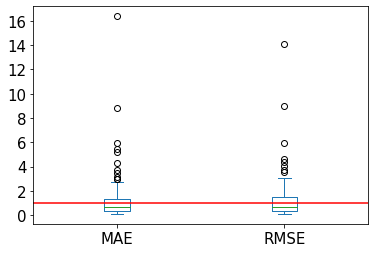

(0.6547002405150597, 0.7107416575107197)

In [7]:
output_dir = os.path.join(os.path.expanduser("~"), f"deep_patient/outputs/synthetic")
score_path = os.path.join(output_dir, "sim12_linear_scores.csv")
save_scores_cts(source_maes, source_mses, source_rmses,  target_maes, target_mses, target_rmses, \
        trans_target_maes, trans_target_mses, trans_target_rmses, score_path)
box_plot_cts_short(score_path)

In [4]:
"""
One run of the experiment
"""
source_features, source_labels, target_features, target_labels = sim_wrapper(num_patient=100)

source_pca = PCA(n_components=2)
source_embs = source_pca.fit_transform(source_features)
source_embs = np.add(source_embs, [source_pca.mean_[0:2]]*source_embs.shape[0])

target_pca = PCA(n_components=2)
target_embs = target_pca.fit_transform(target_features)
target_embs = np.add(target_embs, [target_pca.mean_[0:2]]*target_embs.shape[0])

ot_emd = ot.da.SinkhornTransport(reg_e=1, log=True)
ot_emd.fit(Xs=target_embs, Xt=source_embs)
trans_target_embs = ot_emd.transform(Xs=target_embs, Xt=source_embs)


In [5]:
output_dir = os.path.join(os.path.expanduser("~"), f"deep_patient/outputs/synthetic")
score_path = os.path.join(output_dir, "sim12_linear_scores.csv")

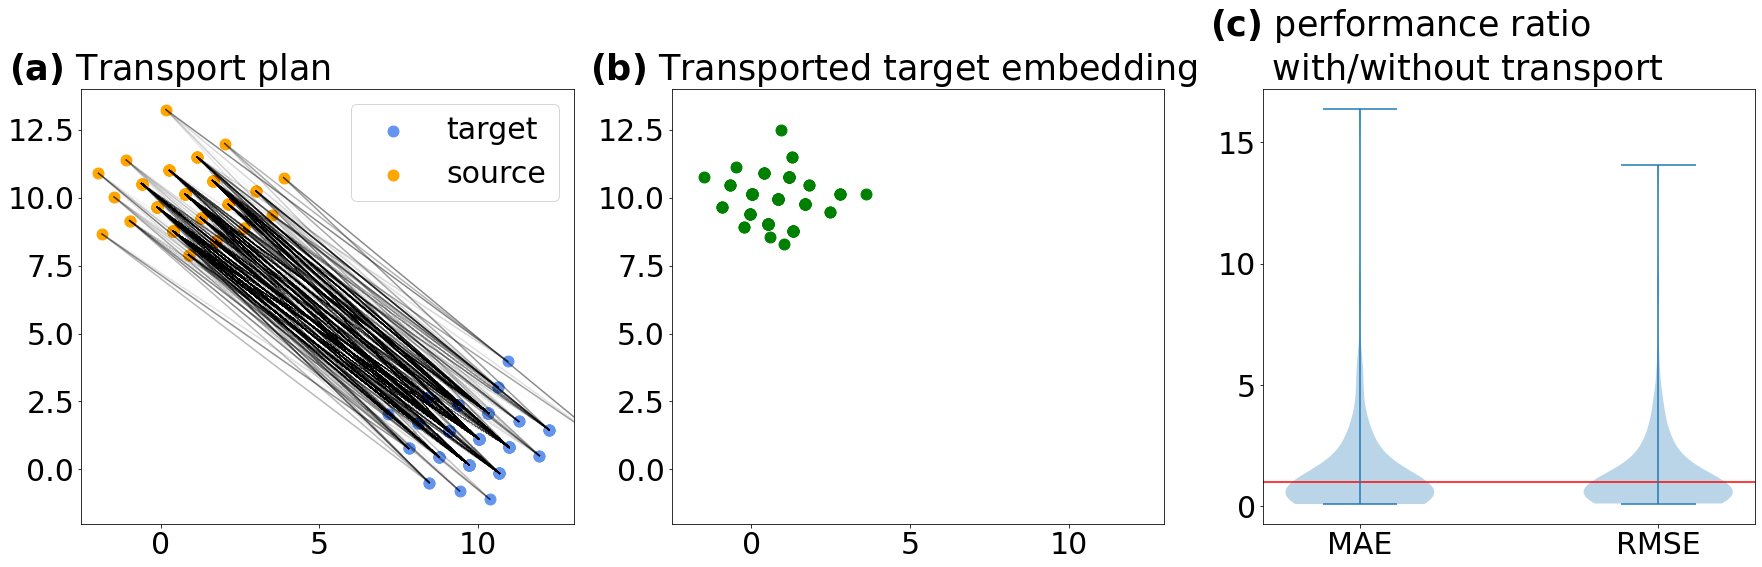

In [9]:
""" 
Generate the figure for the manuscript
"""

text_size = 30
title_size=35
dot_size = 120
plt.figure(1, figsize=(30, 8))

plt.subplot(1, 3, 1)
plt.scatter(target_embs[:, 0], target_embs[:, 1], c="cornflowerblue", label="target", s=dot_size)
plt.scatter(source_embs[:, 0], source_embs[:, 1], c="orange", label="source", s=dot_size)
plt.xlim(-2.5, 13)
plt.ylim(-2, 14)
plt.tick_params(labelsize=text_size)
ot.plot.plot2D_samples_mat(target_embs, source_embs, ot_emd.coupling_, c='black', alpha=0.5)
plt.legend(fontsize=text_size)
plt.title(r"$\bf{(a)}$ Transport plan", x=0.18, fontsize=title_size)


plt.subplot(1, 3, 2)
plt.scatter(trans_target_embs[:, 0], trans_target_embs[:, 1], c="green", s=dot_size)
plt.xlim(-2.5, 13)
plt.ylim(-2, 14)
plt.tick_params(labelsize=text_size)
plt.title(r'$\bf{(b)}$ Transported target embedding', x=0.45, fontsize=title_size)

ax3 = plt.subplot(1, 3, 3)

scores_df = pd.read_csv(score_path, index_col=None, header=0)

target_mae = scores_df['target_mae']
target_rmse = scores_df['target_rmse']

trans_target_mae = scores_df['trans_target_mae']
trans_target_rmse = scores_df['trans_target_rmse']

# transported target to target mae
trans_target_target_mae = [special_div(i, j) for i, j in zip(trans_target_mae, target_mae)]

# transported source to source rmse
trans_target_target_rmse = [special_div(i, j) for i, j in zip(trans_target_rmse, target_rmse)]

# Pandas dataframe
data = pd.DataFrame({
    'MAE ratio': trans_target_target_mae,
    'RMSE ratio': trans_target_target_rmse
})

# Plot the baseline
ax3.axhline(y = 1, color = 'r', linestyle = '-')
ax3.set_title(r"$\bf{(c)}$ performance ratio"+"\n"+r"$\ \ $"+"          with/without transport", x=0.28, fontsize=title_size)
ax3.violinplot(data)
ax3.set_xticks([1,2])
ax3.set_xticklabels(['MAE', 'RMSE'], fontsize=text_size)
ax3.yaxis.set_tick_params(labelsize=text_size)

save_path = os.path.join(output_dir, "sim12_res.pdf")
plt.savefig(save_path, bbox_inches='tight')

plt.show()